<a href="https://colab.research.google.com/github/IKRAM3498/DS2/blob/main/winequality(code).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [3]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset Wine Quality (id = 186)
wine_quality = fetch_ucirepo(id=186)

# data (pandas DataFrame)
X = wine_quality.data.features   # Variables d’entrée
y = wine_quality.data.targets    # Qualité du vin (score)

# Affichage du résumé
print("========= Dataset Metadata =========\n")
print(wine_quality.metadata)

print("\n========= Variables =========\n")
print(wine_quality.variables)

print("\n========= Aperçu des données =========\n")
print(X.head())
print("\nLabel (qualité) :")
print(y.head())


========= Dataset Metadata =========

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE

In [4]:
# Y = 0 si mauvaise qualité (<=5), Y = 1 sinon
y = y.squeeze()           # transforme en Series
Y = [0 if val <=5 else 1 for val in y]


In [5]:
import numpy as np

unique, counts = np.unique(Y, return_counts=True)
print("\n========= Répartition des classes =========")
print(dict(zip(unique, counts)))



========= Répartition des classes =========
{np.int64(0): np.int64(2384), np.int64(1): np.int64(4113)}


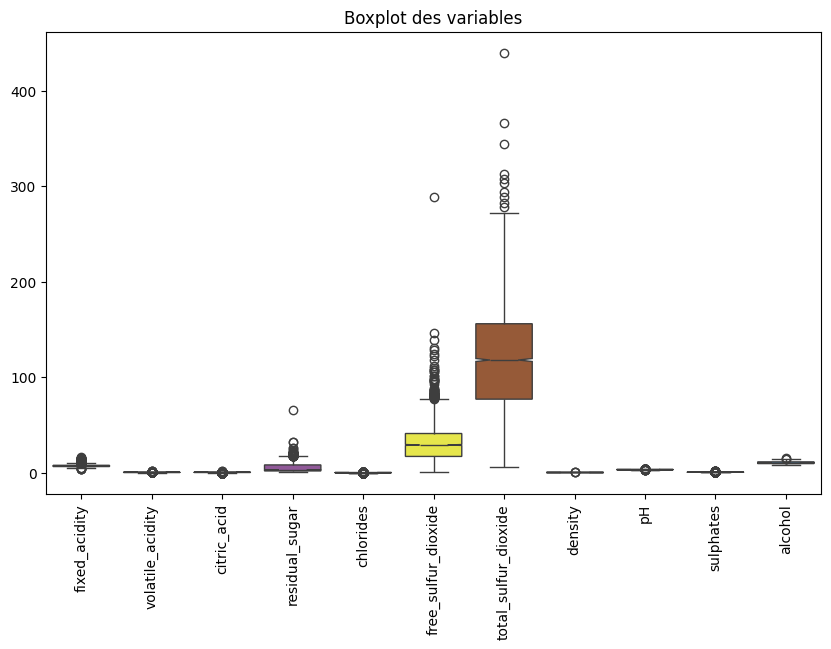

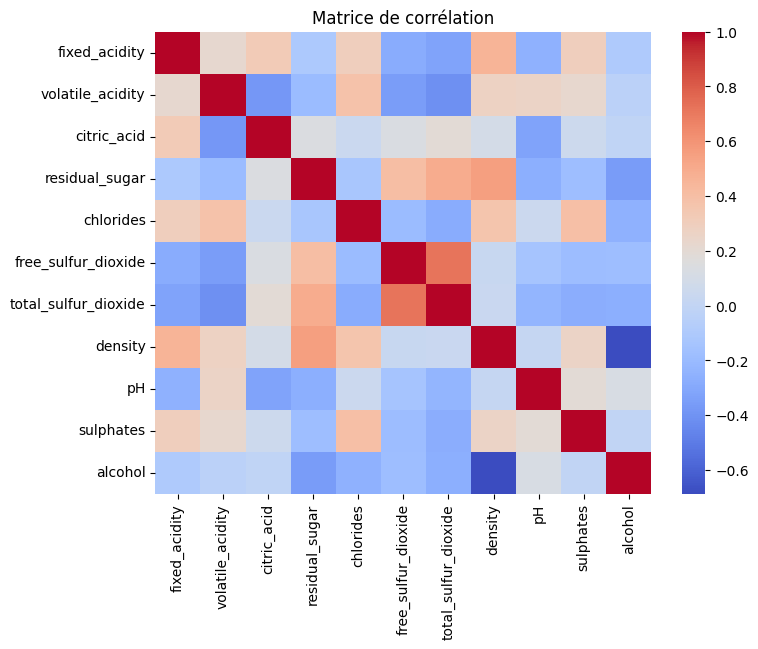

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(data=X, orient="v", palette="Set1", notch=True)
plt.xticks(rotation=90)
plt.title("Boxplot des variables")
plt.show()

plt.figure(figsize=(8,6))
corr = X.corr()
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()


In [7]:
from sklearn.model_selection import train_test_split

Xa, Xt, Ya, Yt = train_test_split(X, Y, stratify=Y, test_size=1/3, shuffle=True)
Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, stratify=Ya, test_size=0.5, shuffle=True)


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

k_vector = np.arange(1, 37, 2)
error_train = np.empty(k_vector.shape)
error_val = np.empty(k_vector.shape)

for ind, k in enumerate(k_vector):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(Xa, Ya)

    Ypred_train = clf.predict(Xa)
    error_train[ind] = 1 - accuracy_score(Ya, Ypred_train)

    Ypred_val = clf.predict(Xv)
    error_val[ind] = 1 - accuracy_score(Yv, Ypred_val)


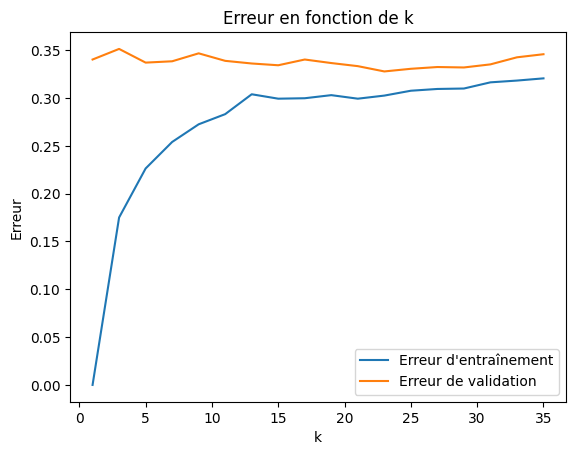

In [9]:
plt.plot(k_vector, error_train, label="Erreur d'entraînement")
plt.plot(k_vector, error_val, label="Erreur de validation")
plt.xlabel("k")
plt.ylabel("Erreur")
plt.legend()
plt.title("Erreur en fonction de k")
plt.show()


In [10]:
err_min, ind_opt = error_val.min(), error_val.argmin()
k_star = k_vector[ind_opt]
print("\nMeilleur k =", k_star)



Meilleur k = 23


In [11]:
clf = KNeighborsClassifier(n_neighbors = k_star)
clf.fit(Xa, Ya)
Ypred_t = clf.predict(Xt)
error_test = 1 - accuracy_score(Yt, Ypred_t)
print("Erreur test finale =", error_test)


Erreur test finale = 0.35410895660203134


In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(Xa)

Xa_n = sc.transform(Xa)
Xv_n = sc.transform(Xv)
Xt_n = sc.transform(Xt)
